[IPython Notebook](legacy_spots.ipynb) |  [Python Script](legacy_spots.py)

Comparing Spots in PHOEBE 2.0 vs PHOEBE Legacy
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Spots and Compute Options
---------------------

In [3]:
b.add_spot(component='primary', relteff=0.8, radius=20, colat=45, colon=90, feature='spot01')

<ParameterSet: 4 parameters | qualifiers: colat, colon, radius, relteff>

In [4]:
b.add_dataset('lc', times=np.linspace(0,1,101))

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [5]:
b.add_compute('phoebe', irrad_method='none', compute='phoebe2')

<ParameterSet: 22 parameters | components: primary, secondary>

In [6]:
b.add_compute('legacy', refl_num=0, compute='phoebe1')

<ParameterSet: 9 parameters | components: primary, secondary>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [7]:
b.set_value_all('atm', 'extern_planckint')

In [8]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

In [9]:
b.run_compute('phoebe2', model='phoebe2model')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [10]:
b.run_compute('phoebe1', model='phoebe1model')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Plotting
------------

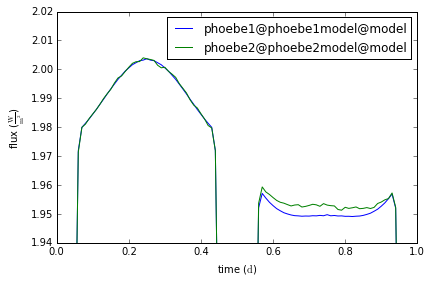

In [14]:
axs, artists = b.plot()
legend = plt.legend()
ylims = plt.ylim(1.94, 2.02)